# EDA 기초

지난 시간에는 DS의 핵심 중 하나인 가설 세우기와 가설 검증하기에 대해서 다뤄보았습니다.

오늘과 다음 시간까지는 EDA의 꽃이라고 불리는 시각화에 대해서 한 번 알아보도록 하겠습니다.

※ 시작하기 전

    본문 내용은 김승일 소장님의 'PCA는 내 친구', 김윤섭님의 '차원 축소와 시각화', 그리고 아래 깃허브를 참조했습니다.

[링크](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)

[링크](https://github.com/minsuk-heo/python_tutorial/blob/master/data_science/pca/PCA.ipynb)

## Unit 6. PCA

PCA, 주성분 분석은 고차원의 데이터를 저차원으로 낮추는 알고리즘입니다.

시각화는 최대 3차원에 한정되어있는데 우리가 다루는 데이터는 3차원을 가볍게 넘는 경우가 많습니다. 이런 경우 PCA와 같은 차원 축소 알고리즘을 이용하면 보다 쉽게 시각화를 할 수 있습니다.

## Unit 6-1. PCA 이해하기

우선 고유값과 고유 벡터부터 알아봅시다

아래와 같은 시스템이 있습니다.

a를 넣으니 b로, c를 넣으니 d로 만들어주는 시스템입니다.

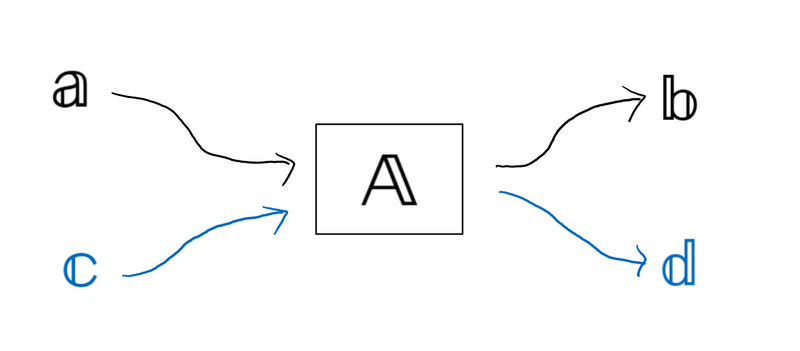

그런데 유일하게 x에는 다르게 적용됩니다.

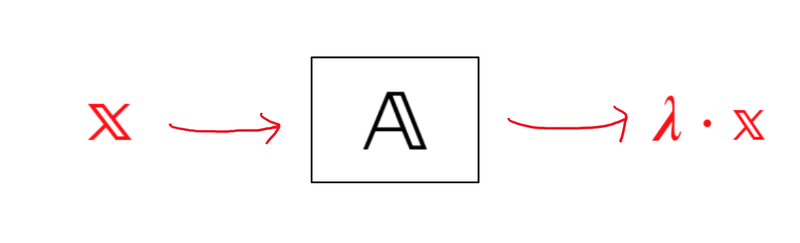

A에 x를 집어넣으면 x보다 조금 크거나 조금 작은 λx가 나옵니다.

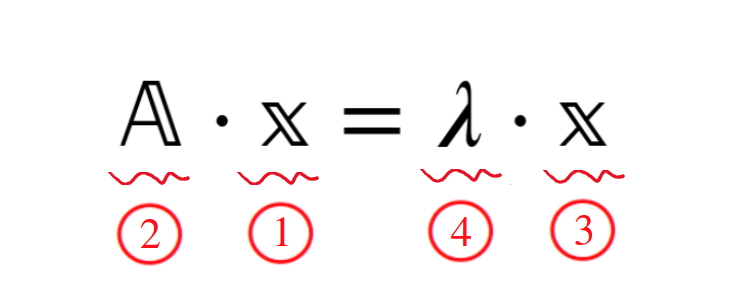

유일하게 x에만 이렇게 되기 때문에 A를 고유벡터, λ를 고유값이라고 부릅니다.

고유 벡터는 알겠는데 이걸 어디에 쓰나요?

그 전에 잠깐 아래 그림부터 보고 가시죠.

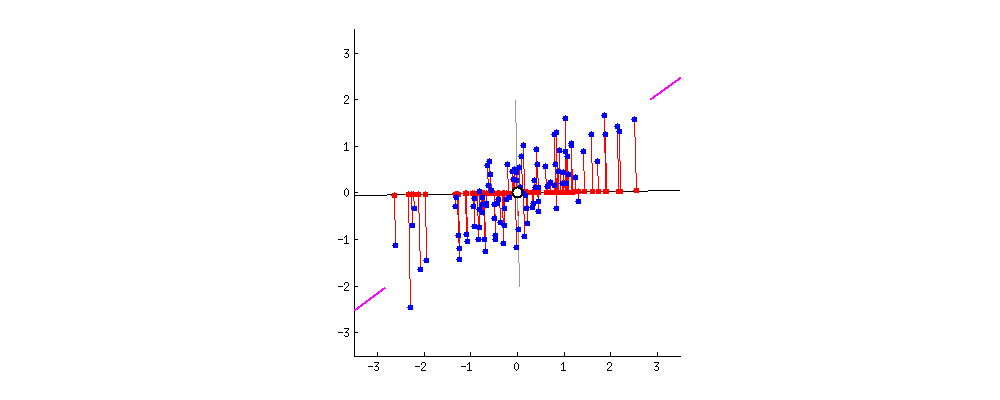


[출처](https://ratsgo.github.io/machine%20learning/2017/04/24/PCA/)

위 파란 점을 사영할때 가장 잘 반영하는 각도는 언제일까요?

아래 그림을 보시죠.

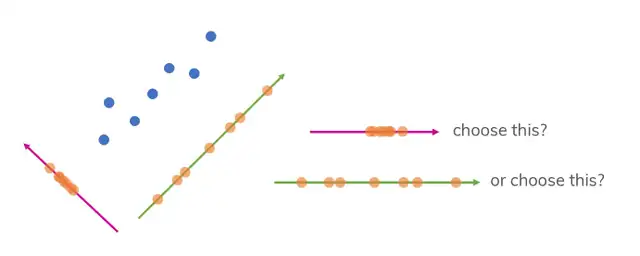

[출처](https://dinhanhthi.com/principal-component-analysis/)

1번? 2번?

x가 가장 길게(분산이 크게) 분포될 수 있는 벡터가 고유벡터입니다.

정리.

PCA는 차원을 축소하는 알고리즘이고 그 중 데이터를 가장 잘 표현할 수 있는 고유벡터를 찾아내는 것이다!

## Unit 6-2. PCA 해보기

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

In [2]:
df = pd.read_csv('/content/서울특별시 전월세가 정보.csv', encoding = 'cp949')

In [3]:
df.head()

,지번코드,기관코드,일련번호,접수년도,자치구코드,자치구명,법정동코드,법정동명,본번,부번,건물명,층,임대건물코드,임대건물명,임대면적,전월세구분코드,전월세구분,보증금,임대료,계약년도,계약일자,건축년도
0,1144010900105150001,3130049,77,2022,11440,마포구,10900,염리동,515.0,1.0,상록,17.0,1,아파트,58.71,1,전세,48000,0,2022,20220128,1997.0
1,1150010300103470008,3150047,445,2022,11500,강서구,10300,화곡동,347.0,8.0,감성하이츠,4.0,4,다세대/연립,40.52,1,전세,27300,0,2022,20220128,2017.0
2,1150010300,3150047,446,2022,11500,강서구,10300,화곡동,NaN,NaN,NaN,NaN,2,단독/다가구,31.13,3,준월세,5000,25,2021,20210714,1986.0
3,1150010300,3150047,447,2022,11500,강서구,10300,화곡동,NaN,NaN,NaN,NaN,2,단독/다가구,31.13,3,준월세,5000,30,2021,20211129,1986.0
4,1150010300109260010,3150047,448,2022,11500,강서구,10300,화곡동,926.0,10.0,행복타운(926-10),5.0,1,아파트,12.24,1,전세,7000,0,2021,20211231,2012.0


In [4]:
df['자치구명'].unique()

array(['마포구', '강서구', '강남구', '도봉구', '노원구', '중랑구', '동대문구', '광진구', '동작구',
       '영등포구', '은평구', '양천구', '서대문구', '강동구', '성북구', '강북구', '송파구', '구로구',
       '성동구', '관악구', '서초구', '금천구', '용산구', '중구', '종로구'], dtype=object)

In [5]:
df['전월세구분'].unique() 

array(['전세', '준월세', '준전세', '월세'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(-1.5835997777014668,
 3.8364032240175003,
 -1.701006769646555,
 4.389812368678799)

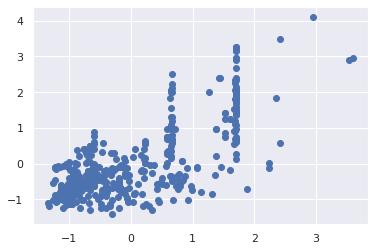

In [7]:
temp = df[df['자치구명'] == '강서구'][df['전월세구분'] == '전세'][['임대면적', '보증금']]

# PCA 및 차원 축소는 다른 차원끼리 비교합니다. 차원간 스케일(단위)에서 차이가 많이 나는 경우 데이터가 오히려 더 왜곡될 수 있습니다.

def mean(df):
    return df.apply(lambda x: (x - x.mean()) / x.std(), axis = 0)

temp = mean(temp)

plt.scatter(temp['임대면적'], temp['보증금'])
plt.axis()

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(temp)

PCA(n_components=2)

In [9]:
print(pca.components_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [10]:
print(pca.explained_variance_)

[1.73242091 0.26757909]


In [11]:
# 벡터를 그려주는 함수

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,
                    facecolor = 'black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

(-1.5835997777014668,
 3.8364032240175003,
 -1.701006769646555,
 4.389812368678799)

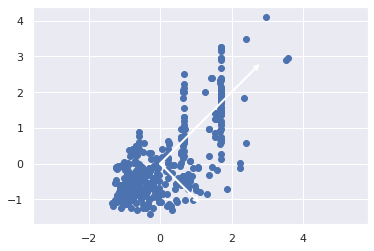

In [12]:
# plot data
plt.scatter(temp['임대면적'], temp['보증금'])

for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')

이것을 잘 사용하면 아래처럼 극단적으로까지는 아니겠지만 고유벡터를 이용해 데이터간 어떤 차이가 있는지 살펴볼 수 있습니다.

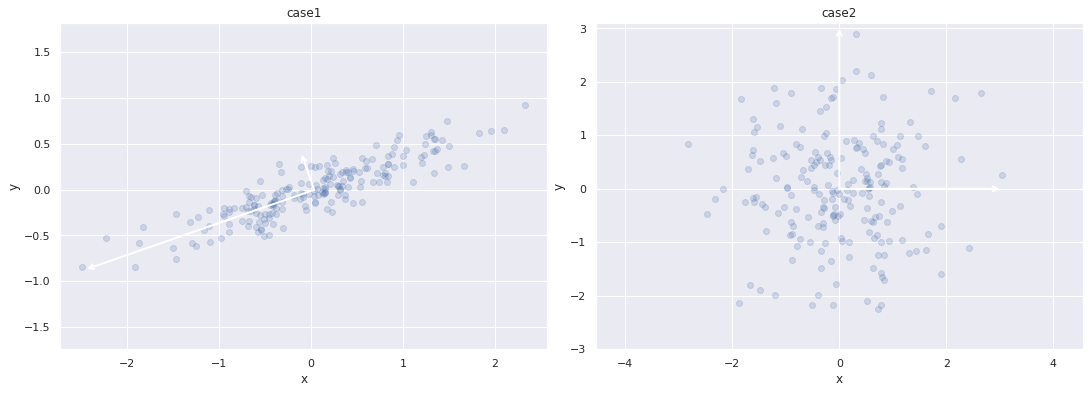

이번에는 본격적으로 PCA를 통한 시각화를 해보겠습니다.

In [13]:
temp_2 = df[df['전월세구분'] == '전세'][['자치구명', '임대면적', '보증금', '건축년도']]
temp_2

,자치구명,임대면적,보증금,건축년도
0,마포구,58.71,48000,1997.0
1,강서구,40.52,27300,2017.0
4,강서구,12.24,7000,2012.0
5,강서구,28.25,22000,2017.0
7,강서구,13.79,10000,2013.0
...,...,...,...,...
12332,금천구,39.71,10000,1985.0
12334,관악구,18.00,12500,1997.0
12335,중랑구,62.52,12000,1992.0
12337,광진구,108.35,37000,1983.0


In [14]:
condition = (df['자치구명'] == '강서구') | (df['자치구명'] == '관악구')

temp_2 = temp_2[condition]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
temp_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 1 to 12334
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자치구명    731 non-null    object 
 1   임대면적    731 non-null    float64
 2   보증금     731 non-null    int64  
 3   건축년도    694 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 28.6+ KB


In [16]:
temp_2 = temp_2.dropna()

In [17]:
X = temp_2[['임대면적', '보증금', '건축년도']]
Y = temp_2[['자치구명']]

In [18]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(X)

In [19]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=fl

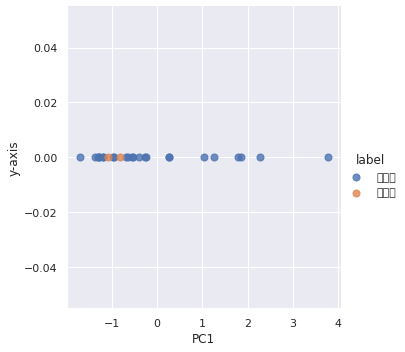

In [20]:
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False,  # x-axis, y-axis, data, no line
           scatter_kws={"s": 50}, # marker size
           hue="label") # color

In [21]:
pca = decomposition.PCA(n_components=2)
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1', 'PC2'])

In [22]:
Y = Y.reset_index(drop = True)

In [23]:
sklearn_result.head()

,PC1,PC2
0,-0.356632,-0.715986
1,-1.711362,0.312622
2,-0.895349,-0.550371
3,-1.595354,0.140228
4,-0.394751,-0.691175


In [24]:
sklearn_result = pd.concat([sklearn_result, Y], axis = 1)
sklearn_result.head()

,PC1,PC2,자치구명
0,-0.356632,-0.715986,강서구
1,-1.711362,0.312622,강서구
2,-0.895349,-0.550371,강서구
3,-1.595354,0.140228,강서구
4,-0.394751,-0.691175,강서구


In [25]:
sklearn_result['자치구명'].unique()

array(['강서구', '관악구'], dtype=object)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50501 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_

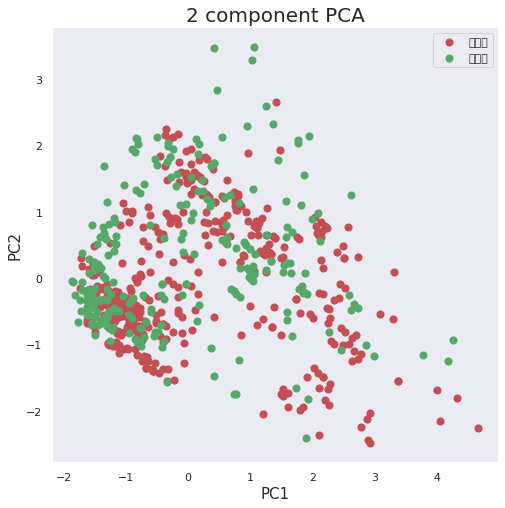

In [26]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = Y['자치구명'].unique()
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = sklearn_result['자치구명'] == target
    ax.scatter(sklearn_result.loc[indicesToKeep, 'PC1'],
               sklearn_result.loc[indicesToKeep, 'PC2'],
               c = color,
               s = 50)
ax.legend(targets)
ax.grid()

## Unit 6-3. PCA의 친구 TSNE 해보기

In [27]:
from sklearn.manifold import TSNE

n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(x_std)

print("tsne_results의 shape: {}".format(tsne_results.shape))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


tsne_results의 shape: (694, 2)


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44396 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_

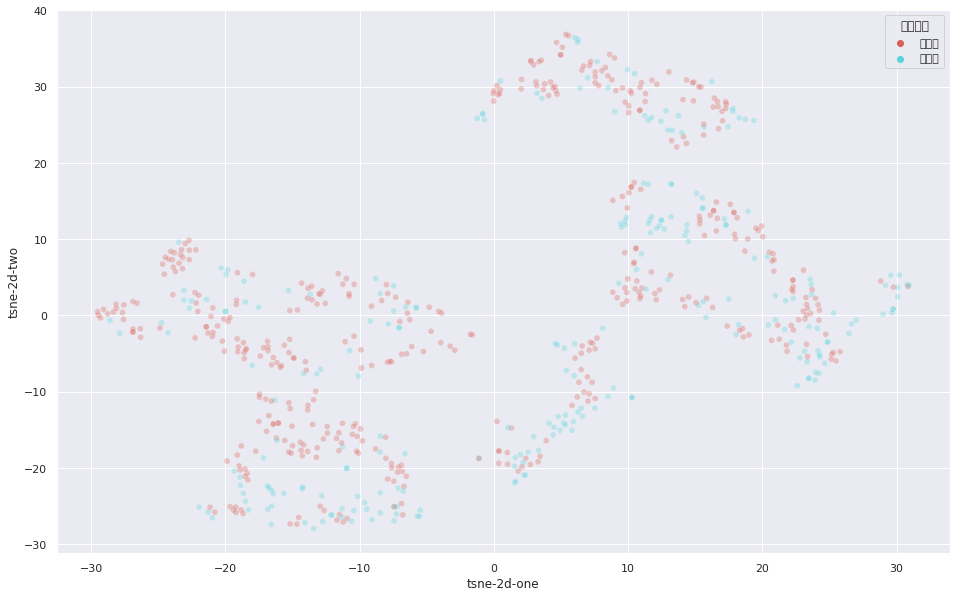

In [28]:
# tsne 결과를 차원별로 추가합니다.

tsne_final = pd.DataFrame(x_std, columns=['임대면적', '보증금', '건축년도'])
tsne_final = pd.concat([tsne_final, Y], axis = 1)
tsne_final['tsne-2d-one'] = tsne_results[:,0]
tsne_final['tsne-2d-two'] = tsne_results[:,1]

# 시각화해 봅니다.
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="자치구명",
    palette=sns.color_palette("hls", 2),
    data=tsne_final,
    legend="full",
    alpha=0.3
)

PCA와 TSNE 특징 정리

PCA는 선형적인 관계에 조금 더 적합.

시각화에는 TSNE가 조금 더 유리.

다만 정보 손실면에서는 PCA가 유리.

## Unit 6-4. (보너스)PCA 더 살펴보기

PCA로 차원축소 하는 방법 및 시각화에 어떻게 사용되는지는 간단하게 살펴보았습니다.

하지만 PCA에는 한가지 중요한 쓰임새가 더 있으니, 바로 노이즈 제거입니다.

In [29]:
digits = load_digits()
print("손글시 이미지의 크기는",digits.data.shape[1],"픽셀 입니다.")

손글시 이미지의 크기는 64 픽셀 입니다.


64 픽셀. 즉, 64차원의 데이터란 의미입니다.

차원 축소하기에 적절한 수치네요.

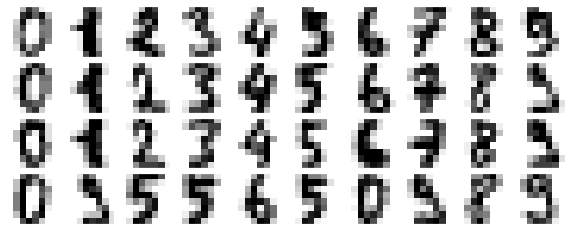

In [30]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data) # 원본 이미지 출력

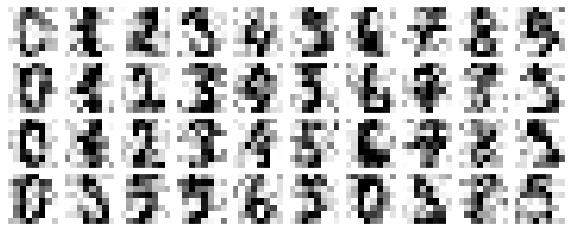

In [31]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy) # 잡음이 섞인 손글씨 이미지 출력

In [32]:
pca = PCA(0.9).fit(digits.data) #데이터의 90% 수준까지 복원 가능한 PCA 기저벡터의 수는?
print("데이터의 90% 수준까지 복원 가능한 PCA 기저벡터의 수는",pca.n_components_,"개 입니다")

데이터의 90% 수준까지 복원 가능한 PCA 기저벡터의 수는 21 개 입니다


In [33]:
compression_ratio=(digits.data.shape[1]-pca.n_components_)/digits.data.shape[1]*100
print("압축률은",compression_ratio,"% 입니다.")

압축률은 67.1875 % 입니다.


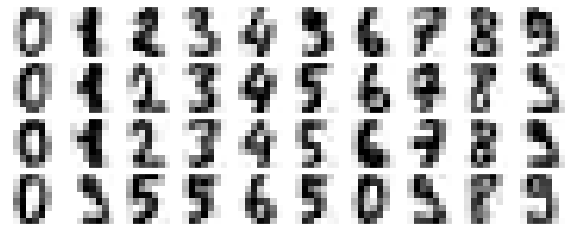

In [34]:
components = pca.transform(digits.data)
filtered = pca.inverse_transform(components)
plot_digits(filtered) #복원된 이미지

여기까지 다들 잘 따라 오셨나요?

하지만 눈치 채셨겠지만 우리 의도와는 다르게 시각화에 대한 효과가 썩 훌륭하진 않습니다.

크게 두가지가 부족해서인데요,

첫번째는 적절한 그래프 선택 실패

두번째는 도메인 지식의 부재

였습니다.

잠깐 아래 블로그를 살펴보고 오시죠.

[링크](https://www.finereport.com/kr/%EC%B0%A8%ED%8A%B8-%EC%A2%85%EB%A5%98-14-%EC%A2%85-%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0/)

### 조별과제 1(조 내에서 토의)

캐글 competition에서 주제를 하나 고르고 잘 된 EDA, 혹은 시각화 노트북을 찾아봅시다.

이후 위에서 나온 블로그를 참고해 왜 그런 그래프를 사용했는지 생각해보고 조별로 이야기를 나눠봅시다.

+) 추가 과제

오늘 나온 **서울시 전월세가 정보** 중 자치구별 차이를 비교하려고 했으면 어떤 그래프를 사용하면 좋았을까요?